In [188]:
import pandas as pd
import numpy as np


In [200]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [202]:
test

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48
0,1,1,D3,26,0.487179,2,3,1,0.611940,0.781818,...,0,0,0,0,0,0,0,0,0,0
1,3,1,A2,26,0.076923,2,3,1,0.626866,0.727273,...,0,0,0,0,0,0,0,0,0,0
2,4,1,D3,26,0.144667,2,3,1,0.582090,0.709091,...,0,0,0,0,0,0,0,0,0,0
3,9,1,A1,26,0.151709,2,1,1,0.522388,0.654545,...,0,0,0,0,0,0,0,0,1,1
4,12,1,A1,26,0.076923,2,3,1,0.298507,0.672727,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19760,79093,1,D3,26,0.128205,2,3,1,0.537313,0.636364,...,0,0,0,0,0,0,0,0,0,0
19761,79099,1,D4,10,0.230769,2,3,1,0.134328,0.618182,...,0,0,0,0,0,0,0,0,0,0
19762,79102,1,A2,26,0.076923,2,3,1,0.850746,0.727273,...,0,0,0,0,0,0,0,0,0,0
19763,79125,1,D1,26,0.487179,2,3,1,0.522388,0.745455,...,0,0,0,0,0,0,0,0,0,0


In [191]:
test.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48
0,1,1,D3,26,0.487179,2,3,1,0.611940,0.781818,...,0,0,0,0,0,0,0,0,0,0
1,3,1,A2,26,0.076923,2,3,1,0.626866,0.727273,...,0,0,0,0,0,0,0,0,0,0
2,4,1,D3,26,0.144667,2,3,1,0.582090,0.709091,...,0,0,0,0,0,0,0,0,0,0
3,9,1,A1,26,0.151709,2,1,1,0.522388,0.654545,...,0,0,0,0,0,0,0,0,1,1
4,12,1,A1,26,0.076923,2,3,1,0.298507,0.672727,...,0,0,0,0,0,0,0,0,0,0


In [192]:
lifeDF = train.append(test)
lifeDF.isna().sum()

Id                        0
Product_Info_1            0
Product_Info_2            0
Product_Info_3            0
Product_Info_4            0
                      ...  
Medical_Keyword_45        0
Medical_Keyword_46        0
Medical_Keyword_47        0
Medical_Keyword_48        0
Response              19765
Length: 128, dtype: int64

In [193]:
lifeDF.isna().sum().sum()

543544

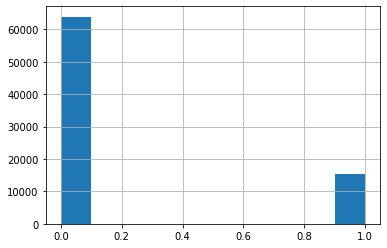

In [194]:
lifeDF["Medical_Keyword_15"].hist()

In [195]:
lifeDF["MedHistAv"] = lifeDF.filter(like="Medical_History_").mean(axis=1)
lifeDF["MedKeyAv"] = lifeDF.filter(like="Medical_Keyword_").mean(axis=1)
lifeDF["InsuranceHistAv"] = lifeDF.filter(like="Insurance_History_").mean(axis=1)
lifeDF["EmploymentAv"] = lifeDF.filter(like="Employment_Info_").mean(axis=1)
lifeDF["FamilyHistAv"] = lifeDF.filter(like="Family_Hist_").mean(axis=1)

In [196]:
lifeDF.drop(lifeDF.filter(like="Medical").columns, axis=1, inplace = True)
lifeDF.drop(lifeDF.filter(like="Insurance_History_").columns, axis=1, inplace = True)
lifeDF.drop(lifeDF.filter(like="Employment_Info_").columns, axis=1, inplace = True)
lifeDF.drop(lifeDF.filter(like="Family_Hist_").columns, axis=1, inplace = True)

In [197]:
lifeDF.isna().sum()

Id                     0
Product_Info_1         0
Product_Info_2         0
Product_Info_3         0
Product_Info_4         0
Product_Info_5         0
Product_Info_6         0
Product_Info_7         0
Ins_Age                0
Ht                     0
Wt                     0
BMI                    0
InsuredInfo_1          0
InsuredInfo_2          0
InsuredInfo_3          0
InsuredInfo_4          0
InsuredInfo_5          0
InsuredInfo_6          0
InsuredInfo_7          0
Response           19765
MedHistAv              0
MedKeyAv               0
InsuranceHistAv        0
EmploymentAv           0
FamilyHistAv           0
dtype: int64

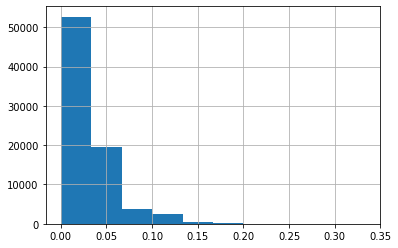

In [198]:
lifeDF["MedKeyAv"].hist()

In [210]:
test = lifeDF[lifeDF['Response'].isna()].drop("Response", axis=1)
train = lifeDF[lifeDF['Response'].notnull()]

In [211]:
test

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,MedHistAv,MedKeyAv,InsuranceHistAv,EmploymentAv,FamilyHistAv
0,1,1,D3,26,0.487179,2,3,1,0.611940,0.781818,...,11,3,1,1,1,2.351351,0.062500,2.142857,1.108333,1.462671
1,3,1,A2,26,0.076923,2,3,1,0.626866,0.727273,...,8,3,1,1,1,11.894737,0.000000,1.250208,1.045000,1.091964
2,4,1,D3,26,0.144667,2,3,1,0.582090,0.709091,...,3,3,1,1,1,11.763158,0.062500,2.142857,2.098833,1.442879
3,9,1,A1,26,0.151709,2,1,1,0.522388,0.654545,...,3,3,1,1,1,6.611111,0.062500,1.375083,2.201667,1.120777
4,12,1,A1,26,0.076923,2,3,1,0.298507,0.672727,...,8,3,1,2,1,12.078947,0.020833,2.142857,2.047500,0.943186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19760,79093,1,D3,26,0.128205,2,3,1,0.537313,0.636364,...,8,3,1,1,1,2.621622,0.000000,1.625125,2.060833,1.366059
19761,79099,1,D4,10,0.230769,2,3,1,0.134328,0.618182,...,8,3,1,2,1,2.756757,0.000000,1.750025,3.002500,0.893722
19762,79102,1,A2,26,0.076923,2,3,1,0.850746,0.727273,...,8,2,1,1,1,8.710526,0.062500,1.375083,1.091833,0.959325
19763,79125,1,D1,26,0.487179,2,3,1,0.522388,0.745455,...,4,3,1,1,1,6.555556,0.000000,1.375027,3.433000,1.347923


In [204]:
train

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Response,MedHistAv,MedKeyAv,InsuranceHistAv,EmploymentAv,FamilyHistAv
0,1,1,D3,26,0.487179,2,3,1,0.611940,0.781818,...,3,1,1,1,NaN,2.351351,0.062500,2.142857,1.108333,1.462671
1,3,1,A2,26,0.076923,2,3,1,0.626866,0.727273,...,3,1,1,1,NaN,11.894737,0.000000,1.250208,1.045000,1.091964
2,4,1,D3,26,0.144667,2,3,1,0.582090,0.709091,...,3,1,1,1,NaN,11.763158,0.062500,2.142857,2.098833,1.442879
3,9,1,A1,26,0.151709,2,1,1,0.522388,0.654545,...,3,1,1,1,NaN,6.611111,0.062500,1.375083,2.201667,1.120777
4,12,1,A1,26,0.076923,2,3,1,0.298507,0.672727,...,3,1,2,1,NaN,12.078947,0.020833,2.142857,2.047500,0.943186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19760,79093,1,D3,26,0.128205,2,3,1,0.537313,0.636364,...,3,1,1,1,NaN,2.621622,0.000000,1.625125,2.060833,1.366059
19761,79099,1,D4,10,0.230769,2,3,1,0.134328,0.618182,...,3,1,2,1,NaN,2.756757,0.000000,1.750025,3.002500,0.893722
19762,79102,1,A2,26,0.076923,2,3,1,0.850746,0.727273,...,2,1,1,1,NaN,8.710526,0.062500,1.375083,1.091833,0.959325
19763,79125,1,D1,26,0.487179,2,3,1,0.522388,0.745455,...,3,1,1,1,NaN,6.555556,0.000000,1.375027,3.433000,1.347923
